In [1]:
import pickle
from pprint import pprint
import copy
import numpy as np
import os
import ast
import pandas as pd

In [2]:
LOGDIR = "sensi_logs/sensitivity_many_points/2021_07_05_T_13_09_55/"

In [3]:
logfile = os.path.join(LOGDIR, "sensitivity.log")
with open(logfile, "r") as f:
    log = f.readlines()

In [4]:
params_names = [
    item for sublist in (ast.literal_eval(log[3].strip("\n"))) for item in sublist
]
print(params_names)

[['Q1', 'anhar']]


In [5]:
data_list_dict = list()
for line in log[9:]:
    if line[0] == "{":
        temp_dict = ast.literal_eval(line.strip("\n"))
        for index, param_name in enumerate(params_names):
            temp_dict[param_name[0]] = temp_dict["params"][index]
        temp_dict.pop("params")
        data_list_dict.append(temp_dict)

In [6]:
data_df = pd.DataFrame(data_list_dict)

In [7]:
data_df.keys()

Index(['goal', 'time', 'Q1'], dtype='object')

In [8]:
data_df.describe()

,goal,Q1
count,100.000000,1.000000e+02
mean,6.726772,-2.100000e+08
std,5.503950,2.930454e+06
min,-0.009336,-2.150000e+08
25%,1.734420,-2.125000e+08
50%,5.751518,-2.100000e+08
75%,10.982957,-2.075000e+08
max,19.296438,-2.050000e+08


In [9]:
from  matplotlib import rcParams
import matplotlib.pyplot as plt 

In [10]:
rcParams["axes.grid"] = True
rcParams["grid.linestyle"] = "--"

# enable usetex by setting it to True if LaTeX is installed
rcParams["text.usetex"] = False
rcParams["font.size"] = 16
rcParams["font.family"] = "serif"

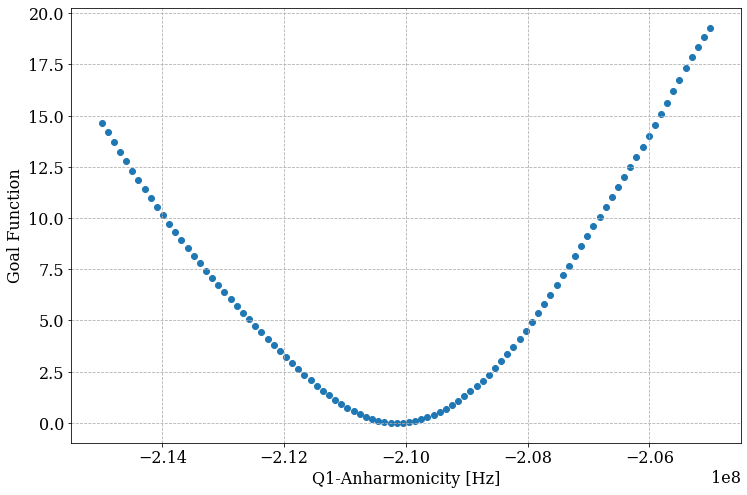

In [11]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)
ax.set_xlabel("Q1-Anharmonicity [Hz]")
ax.set_ylabel("Goal Function")
ax.scatter(data_df["Q1"], data_df["goal"])